# Nonlinear computations in spiking neural networks through multiplicative synapses - Figure 4
Michele Nardin, James W Phillips, William F Podlaski, Sander W Keemink

### Imports

In [9]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Plot settings

In [14]:
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams['figure.dpi'] = 90

# colors
cs = ['#1f77b4',
'#ff7f0e',
'#2ca02c',
'#d62728',
'#9467bd',
'#8c564b',
'#e377c2',
'#7f7f7f',
'#bcbd22',
'#17becf']

## Expected numbers of connections + simulation

### Fast synapses

Fast connections are given by $D^T D$.

We will consider different decoder matrix densitites ($p$) and dimensions of the output signal $K$

In [5]:
# expected value of fast synapses as a function of N,K and p
def ef(N,K,p):
    return (N*(N-1))/2*(1 - (1-p**2)**K)

In [3]:
# probability of each neuron to code for a given dimension
ps = np.arange(1,101)/100 
# number of neurons
N=100 

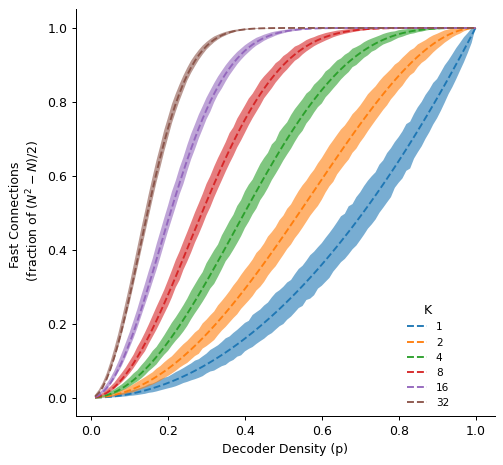

In [20]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)

# K is the dimensionality of the signal
for K in [1,2,4,8,16,32]:

    # fast synapses density
    fast=[]
    for sh in range(1000): # 1000 simulations
        res = []
        for p in ps:
            # for each probability p, initialize matrix D to 0 or 1
            D = np.random.rand(K,N) < p
            # check the number of nonzero entries of D^T D
            res.append(np.mean(D.T@D))
        fast.append(res)
    # plot as a fraction of total possible ones
    plt.plot(ps, [ef(N,K,p) / (N*(N-1))*2 for p in ps],label=str(K),ls='dashed')
    m=np.mean(fast,0)
    std=np.std(fast,0)
    # plot the average and STD of the simulations
    plt.fill_between(ps, m-std,m+std,alpha=0.6)

# plt.title('Simulation: number of fast connections')
plt.xlabel('Decoder Density (p)')
plt.ylabel('Fast Connections \n (fraction of $(N^2 - N)/2$)')# \n ( $ ||\Omega_f|| / N(N-1)/2$)')
[ax.spines[s].set_visible(False) for s in ['right','top']]
plt.legend(title='K',frameon=False, fontsize='small',loc=(0.78,0.01))

### slow synapses due to linear computation

Slow connections are given by: $D^T(A + I)D = D^T A D + D^T D$.
We consider here the fraction of connections that are due to linear computation, i.e. coming from $D^T A D$.

We will consider different decoder matrix densitites ($p$) and number of nonzero entries in $A$ ($N_A$)

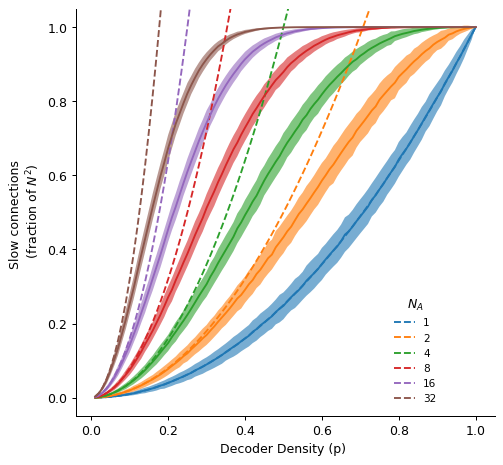

In [22]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)

# number of nonzero entries in A
for iNa,NA in enumerate([1,2,4,8,16,32]):
    slow=[]
    for sh in range(1000):
        res = []
        for p in ps:
            D = np.random.rand(K,N) < p
            A = np.zeros([K,K])
            # number of entries in A that are nonzero
            for _ in range(NA):
                # set a random entry of A to 1
                A[np.random.randint(K),np.random.randint(K)]=1
            # count the number of nonzero slow connections
            res.append(np.mean((D.T@A@D)>0))
        slow.append(res)
    # plot as a fraction compared to total possible ones
    plt.plot(ps, [NA * (N*p)**2 / N**2 for p in ps],color=cs[iNa],ls='dashed',label=NA)
    plt.plot(ps,np.mean(slow,0),color=cs[iNa])
    m=np.mean(slow,0)
    std=np.std(slow,0)
    # plot mean and STD of simulations
    plt.fill_between(ps, m-std,m+std,alpha=0.6)

plt.ylim([-0.05,1.05])
plt.xlabel('Decoder Density (p) ')
plt.ylabel('Slow connections \n (fraction of $N^2$)')
[ax.spines[s].set_visible(False) for s in ['right','top']]
plt.legend(title='$N_A$',frameon=False, fontsize='small',loc=(0.75,0.02))

### quadratic connections

Quadratic connections are given by: $D^TB (D \otimes D)$.

We will consider different decoder matrix densitites ($p$) and number of nonzero entries in $B$ ($N_B$)

In [ ]:
## RUNNING TIME ##
# this script will take 15~30 minutes depending on your PC #
# reduce number of simulations to obtain less precise yet faster results #

******

Text(0.5, 0, 'Decoder Density (p)')

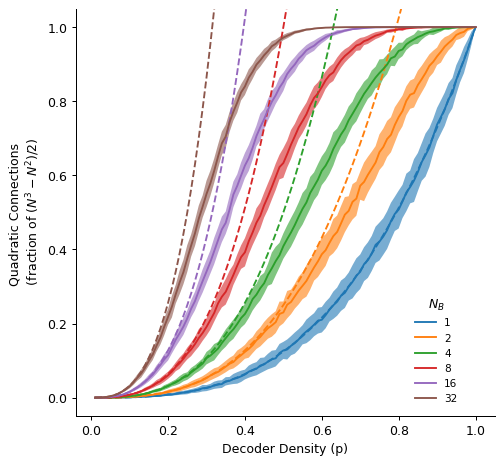

In [26]:
plt.figure(figsize=(6,6))
ax = plt.subplot(111)
# number of nonzero entries in B
for iNb,NB in enumerate([1,2,4,8,16,32]):
    print('*',end='')
    quad=[]
    nq=[]
    for sh in range(100): ## REDUCE HERE - 10~20 gives decent results
        res = []
        for p in ps:
            # random initialization of D
            D = np.random.rand(K,N) < p
            B = np.zeros([K,K**2])
            # NB random entries of B are nonzero
            for _ in range(NB):
                B[np.random.randint(K),np.random.randint(K**2)]=1
            # count nonzero synapses
            DKB = (D.T@B@np.kron(D,D))>0
            a=[np.sum(np.triu(DKB[i].reshape(N,N),1))for i in range(N)]
            res.append(np.sum(a)/((N**3-N**2)/2))
            nq.append(np.sum(D))
        quad.append(res)

    plt.plot(ps,np.mean(quad,0), label=str(NB),color=cs[iNb])
    plt.plot(ps, [NB * p**3 for p in ps],color=cs[iNb],ls='dashed')
    m=np.mean(quad,0)
    std=np.std(quad,0)
    plt.fill_between(ps, m-std,m+std,alpha=0.6)
    
plt.ylim([-0.05,1.05])
plt.ylabel('Quadratic Connections \n (fraction of $(N^3 - N^2)/2$)')
[ax.spines[s].set_visible(False) for s in ['right','top']]
plt.legend(title='$N_B$',frameon=False, fontsize='small',loc=(0.8,0.02))
plt.xlabel('Decoder Density (p)')